In [1]:
from utils import (DecayProcess, charged_kaon, charged_pion, electron, muon,
                   neutral_pion, neutrino, dnde_photon)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from charged_kaon import make_processes

In [3]:
procs = make_processes()

In [4]:
es = np.geomspace(procs.parent.mass*1e-4, procs.parent.mass, 100)
dnde = dnde_photon(es, procs)

/home/logan/github/Hazma/hazma/decay.py:211: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(


In [7]:
kg_to_lbs = 2.20462
w1 = 60.2
w2 = 58.5
(w1 - w2) * kg_to_lbs

3.747854000000006

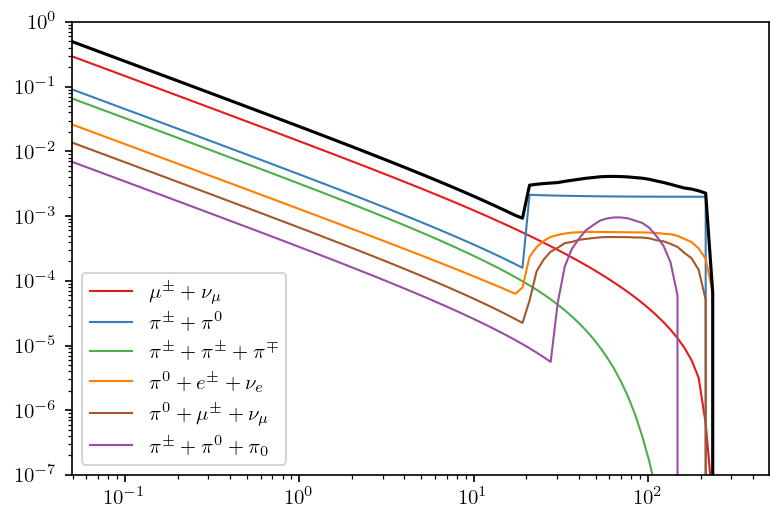

In [6]:
qualitative = [
    "#e41a1c",
    "#377eb8",
    "#4daf4a",
    "#984ea3",
    "#ff7f00",
    "#a65628",
    "#f781bf",
    "#999999",
    "#ffff33",
]

labels = {
    "mu nu" : r"$\mu^{\pm} + \nu_{\mu}$",
    "pi pi0" : r"$\pi^{\pm} + \pi^{0}$",
    "pi pi pi" : r"$\pi^{\pm} + \pi^{\pm} + \pi^{\mp}$",
    "pi pi0 pi0" : r"$\pi^{\pm} + \pi^{0} + \pi_{0}$",
    "pi0 e nu" : r"$\pi^{0} + e^{\pm} + \nu_{e}$",
    "pi0 mu nu" : r"$\pi^{0} + \mu^{\pm} + \nu_{\mu}$",
    "total": r"$\mathrm{Total}$"
}

plot_params = {
    "mu nu" : {"c": qualitative[0], "lw": 1},
    "pi pi0" : {"c": qualitative[1], "lw": 1},
    "pi pi pi" : {"c": qualitative[2], "lw": 1},
    "pi pi0 pi0" : {"c": qualitative[3], "lw": 1},
    "pi0 e nu" : {"c": qualitative[4], "lw": 1},
    "pi0 mu nu" :{"c": qualitative[5], "lw": 1},
    "total": {"c": "k", "lw": 2, "alpha": 0.6},
}



plt.figure(dpi=150)
for key, val in dnde.items():
    plt.plot(es, val, **plot_params[key], label=labels[key])
plt.plot(es, sum(dnde.values()), c="k")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-7, 1)
plt.xlim(np.min(es), np.max(es))
plt.legend()

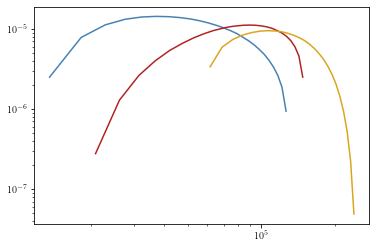

In [22]:
s, ps = procs.processes["pi0 mu nu"].invariant_mass_distributions[(1, 2)]
t, pt = procs.processes["pi0 mu nu"].invariant_mass_distributions[(0, 2)]
u, pu = procs.processes["pi0 mu nu"].invariant_mass_distributions[(0, 1)]

plt.plot(s, ps)
plt.plot(t, pt)
plt.plot(u, pu)
plt.yscale("log")
plt.xscale("log")

In [24]:
process = procs.processes["pi0 e nu"]

dnde_fsr = {
    i: {"dnde": np.zeros_like(es), "count": 0}
    for i in range(len(process.final_states))
}


for pair, dist in process.invariant_mass_distributions.items():
    for i in pair:
        particle = process.final_states[i]
        dnde_fsr[i]["count"] += 1
        # for s, prob in zip(*dist):
        # dnde_fsr[i]["dnde"] += prob * particle.dnde_photon_fsr(photon_energy, s)


In [25]:
dnde_fsr

{0: {'dnde': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'count': 2},
 1: {'dnde': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'count': 2},
 2: {'dnde': array([0., 0., 0., 0., 

In [5]:
def f(x, y, z):
    return x * y + z

In [6]:
g = functools.partial(f, z=1)

In [8]:
g(1, 1)

2

In [18]:
c = np.linspace(-1, 1, 100)
d = np.ma.masked_array(c, c < 0)
d = np.ma.sqrt(d)

In [24]:
d.fill_value = 0.0
d.filled

<bound method MaskedArray.filled of masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, 0.10050378152592153,
                   0.1740776559556984, 0.2247332874877476,
                   0.26590801173915524, 0.30151134457776385,
                   0.3333333333333334, 0.36237153766973956,
                   0.3892494720807616, 0.41438770700537403,
                   0.43808582711518074, 0.46056618647183833,
                   0.4819992036541476, 0.5025189076296062,
                   0.5222329678670937, 0.5412294272573259,
                   0.5595813731096785, 0.5773502691896258,
                   0.5945883900105632, 0.6113406364191522,
                   0.6276459144608479, 0.6435381994422821,
                   0.6590473688161076, 0.6741998624632421,
            